## Scipy's Lognormal Distribution under scipy.stats.lognorm is not setup how you think it should be.
In this Notebook, I will show how Scipy's Lognormal Distribution is different from the equations you are used to seeing for its PDF, CDF, mean, median, variance, stdev, and quantiles.  I will show you how to use it and compare it to what you are used to.

# Normal Distribution

\begin{equation}
\text{Notation}: \ \  \mathcal{N}(\mu, \sigma^2)
\end{equation}

norm.pdf(x, loc, scale) 
\begin{equation}
= \frac{1}{\sqrt{2 \pi \sigma^2 }} \exp \left( -\frac{ (x - \mu)^2}{2 \sigma^2} \right)
\end{equation}

# Lognormal Distribution

\begin{equation}
\text{Notation}: \ \  \ln \mathcal{N}(\mu, \sigma^2)
\end{equation}

Input Parameters: 
- loc: $\ \ \ \ \ \ \     \mu = \ln(data)$ 
- s: $\ \ \ \ \ \ \ \ \   \sigma = sd(\ln(data))$
- scale: $ \ \ \ \ \ = \exp(\mu)$

## Scipy's version of the Lognormal PDF 
Scipy's version is missing a factor of $\mu $ in it.  That is correced with a scale factor, where $scale = \exp(\mu)$.

\begin{equation}
\text{Scipy Version} = \frac{1}{x \ s \ \sqrt{2 \pi}} \exp \left( -\frac{1}{2} \left( \frac{\ln(x)}{s} \right)^2\right)
\end{equation}

- = lognorm.pdf(x, s=sigma, loc=mu, scale=scale),   where we actually use:

- = lognorm.pdf(x/scale, sigma)/scale ,  OR

- = lognorm.pdf(x, sigma, mu/scale, scale) 

THE LAST ONE IS THE BEST TO USE SINCE THIS IS THE SAME FORMAT AS THE INPUT FOR MEAN, MEDIAN, STDEV, VARIANCE, AND THE QUANTILES.

## My version of the Lognormal PDF 
\begin{equation}
\text{My Version} = \frac{1}{x \ \sigma \ \sqrt{2 \pi}} \exp \left( -\frac{ (\ln(x) - \mu)^2}{2 \sigma^2} \right)
\end{equation}


= Lognorm.pdf(x, mu, sigma)

## According to Wikipedia:
### mean, median, mode, variance of the Lognormal Distribution.

\begin{equation}
\text{mean} =  \exp \left( \frac{\mu + \sigma^2}{2} \right)
\end{equation}

\begin{equation}
\text{median} =  \exp \left(\mu \right)
\end{equation}

\begin{equation}
\text{mode} =  \exp \left(\mu - \sigma^2 \right)
\end{equation}

\begin{equation}
\text{variance} =  \left( \exp (\sigma^2) -1 \right) \exp( 2 \mu + \sigma^2)
\end{equation}

## Also use Wolfram Alpha:
https://www.wolframalpha.com/input/?i=lognormaldistribution

    Click on the MORE and Show Formulas buttons.

In [1]:
from __future__ import division
import os
import numpy as np
import pandas as pd
import pyfits

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from scipy.stats import lognorm

/Users/KimiZ/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
modname      = 'sbpl+blackb'
version      = '-01-'
detector     = 'GBMwLAT'

burst        = 'bn080916009'
data_dir     = "/Users/KimiZ/GRBs2/analysis/LAT/%s/integrated/"%burst
mod_dir      = "/Users/KimiZ/GRBs2/analysis/LAT/%s/PYXSPEC/%s/%s/"%(burst, detector, modname)

fakedatafile = os.path.join(data_dir, "fakeit_fitresults_%s_%s.fit"%(modname, version))

In [3]:
Fdata = pyfits.open(fakedatafile)

iter = 0
Bdata = pd.DataFrame()
for name in Fdata[1].data.columns.names:
    Bdata["%s"%name] = Fdata[1].data["%s"%name]
    if 'PARAM' in name:
        iter += 1
    else:
        pass
nPars = iter  # number of parameters in the dataframe.

Bdata = Bdata.astype('float64')  # convert all data to float64.  Need to use when data read in from Pyfits.

In [4]:
Bdata[0:5]  # There are 10,000 rows.  We only show 5 here.

,PARAM1,PARAM2,PARAM3,PARAM4,PARAM5,PARAM6,NDATA,DOF,CSTAT,LOGLIKE,AIC,BIC
0,-1.261117,-2.210855,457.851968,0.011798,38.875822,0.000005,380.0,374.0,337.503791,-168.751896,349.503791,373.144819
1,-1.290142,-2.236438,570.236314,0.010958,42.827951,0.000005,380.0,374.0,365.346271,-182.673136,377.346271,400.987299
2,-1.273492,-2.201938,461.096781,0.011382,43.174253,0.000004,380.0,374.0,412.800833,-206.400417,424.800833,448.441861
3,-1.233421,-2.197873,408.276604,0.011749,34.816958,0.000007,380.0,374.0,402.036990,-201.018495,414.036990,437.678017
4,-1.319688,-2.224199,618.386838,0.010708,41.094380,0.000006,380.0,374.0,346.642245,-173.321122,358.642245,382.283272


# My Lognormal Function.

In [5]:
class LogNormal(object):

    def __init__(self, X=None, Mu=None, Sigma=None):
        self.X = X
        self.Mu = Mu
        self.Sigma = Sigma
        
    def pdf(self, X, Mu, Sigma):
        return (np.exp(-(np.log(X) - Mu)**2 / (2 * Sigma**2)) / (X * Sigma * np.sqrt(2 * np.pi)))

    def cdf(self, X, Mu, Sigma):
        from scipy.special import erf
        return 0.5+0.5*(erf((np.log(X)-Mu)/(np.sqrt(2)*Sigma)))
    
    def mean(self, Mu, Sigma):
        return np.exp(Mu+(0.5*(Sigma**2)))
    
    def median(self, Mu, Sigma=None):
        return np.exp(Mu)
    
    def mode(self, Mu, Sigma):
        return np.exp(Mu-(Sigma**2))
    
    def var(self, Mu, Sigma):
        return (np.exp(Sigma**2)-1)*np.exp(2*Mu+(Sigma**2))
    
    def std(self, Mu, Sigma):
        return np.sqrt((np.exp(Sigma**2)-1) * np.exp(2*Mu+(Sigma**2)))
    

    def quantile(self, Probs, Mu=None, Sigma=None): # all None's have to be last
        from scipy.special import erfinv
        
        probs = [Probs]
        probs = np.asanyarray(probs)
        if not Mu:
            Mu = 0
        if not Sigma:
            Sigma = 1.0

        quant = []
        for i,prob in enumerate(probs):
            stand_norm_quantile = (0 + 1.0 * np.sqrt(2) * erfinv(2* prob-1)) # (Mu + Sigma * np.sqrt(2) * erfinv(2* Prob-1)) 
            quant.append(2.71828**(Mu+(stand_norm_quantile*Sigma)))
        return quant[0]

Lognorm = LogNormal()

## The Normal Distribution was included just for show.

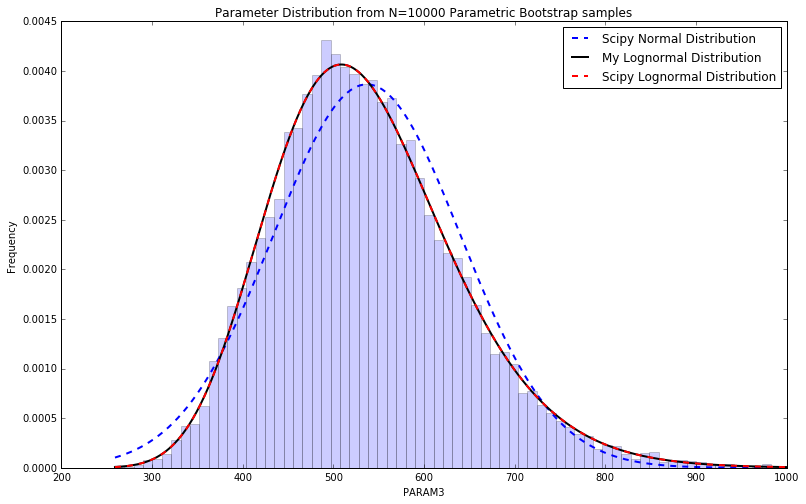

In [6]:
nData = 10000
XLabel = "PARAM3"

data = Bdata[XLabel]

plt.figure(figsize=(13,8))

count, bins, ignored = plt.hist(data, bins=100, normed=True, align='mid', alpha=0.2)


# ************   NORMAL DISTRIBUTION USING scipy.stats.norm  ************ 
# mu and sigma for the Normal Distribution
mu_norm         = np.mean(data)  # mean of the data
sigma_norm      = np.std(data)   # standard deviation of the data

x               = np.linspace(min(bins), max(bins), 1000)
y               = norm.pdf(x, mu_norm, sigma_norm)
plt.plot(x,y, 'b--', lw=2, label= "Scipy Normal Distribution")


# ************   NORMAL DISTRIBUTION USING MY Lognorm function  ************ 
# mu and sigma for the Lognormal Distribution
mu_lognorm      = np.mean(np.log(data))  # the mean of the logged data
sigma_lognorm   = np.std(np.log(data))   # the standard deviation of the logged data

x               = np.linspace(min(bins), max(bins), 1000)
y               = Lognorm.pdf(x, mu_lognorm, sigma_lognorm)
plt.plot(x, y, 'k-', lw=2, label= "My Lognormal Distribution")


# ************   NORMAL DISTRIBUTION USING scipy.stats.lognorm  ************ 
# mu and sigma are the same as the above for the Lognormal Distribution
mu             = mu_lognorm
sigma          = sigma_lognorm
scale          = np.exp(mu_lognorm)

x              = np.linspace(min(bins), max(bins), 1000)
y              = lognorm.pdf(x/scale, sigma)/scale # x, sigma, mu, scale
plt.plot(x, y, 'r--', lw=2, label="Scipy Lognormal Distribution")

plt.xlim(200, 1000)
plt.ylabel("Frequency")
plt.xlabel("%s"%XLabel)
plt.legend(loc='best')
plt.title("Parameter Distribution from N=%i Parametric Bootstrap samples"%nData)

### Showing both ways to use Scipy's Lognormal PDF to plot.

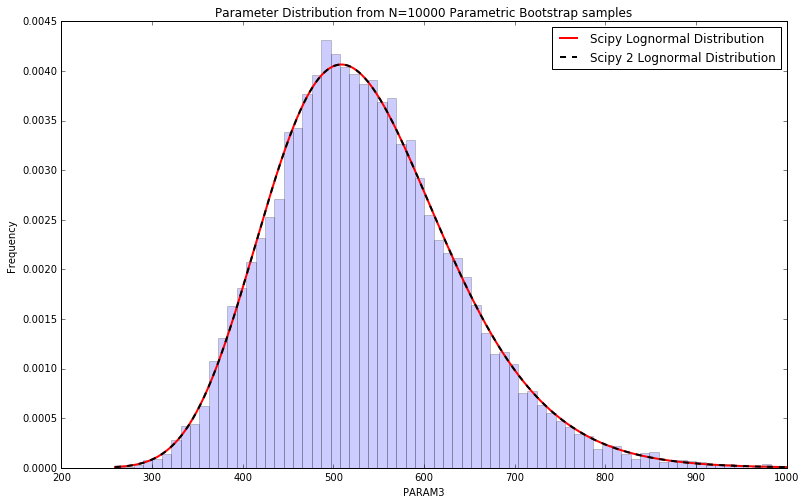

In [7]:
nData = 10000
XLabel = "PARAM3"

data = Bdata[XLabel]

plt.figure(figsize=(13,8))

count, bins, ignored = plt.hist(data, bins=100, normed=True, align='mid', alpha=0.2)


mu             = np.mean(np.log(data))  # the mean of the logged data
sigma          = np.std(np.log(data))   # the standard deviation of the logged data
scale          = np.exp(mu)


x              = np.linspace(min(bins), max(bins), 1000)
y              = lognorm.pdf(x/scale, sigma)/scale # x, sigma, mu, scale
plt.plot(x, y, 'r-', lw=2, label="Scipy Lognormal Distribution")


x              = np.linspace(min(bins), max(bins), 1000)
y              = lognorm.pdf(x, sigma, mu/scale, scale) # x, sigma, mu, scale
plt.plot(x, y, 'k--', lw=2, label="Scipy 2 Lognormal Distribution")

plt.xlim(200,1000)
plt.ylabel("Frequency")
plt.xlabel("%s"%XLabel)
plt.legend(loc='best')
plt.title("Parameter Distribution from N=%i Parametric Bootstrap samples"%nData)

## Showing the Statistics from My Lognormal vs Scipy's Lognormal.

In [8]:
print "My Lognormal Distribution:   Lognorm.mean(mu, sigma),  Lognorm.quantile(prob, mu, sigma)"
print "mean:     %.9f"%Lognorm.mean(mu_lognorm, sigma_lognorm)
print "median:   %.9f"%Lognorm.median(mu_lognorm, sigma_lognorm)
print "mode:     %.9f"%Lognorm.mode(mu_lognorm, sigma_lognorm)
print "variance: %.9f"%Lognorm.var(mu_lognorm, sigma_lognorm)
print "st dev:   %.9f"%Lognorm.std(mu_lognorm, sigma_lognorm)
print "QUANTILES: (LOWER TAIL, UPPER TAIL)"
print "1-sigma:  %.9f, %.9f"%(Lognorm.quantile([0.15865], mu_lognorm, sigma_lognorm), Lognorm.quantile([0.84135], mu_lognorm, sigma_lognorm))
print "2-sigma:  %.9f, %.9f"%(Lognorm.quantile([0.0227499999], mu_lognorm, sigma_lognorm), Lognorm.quantile([0.97725], mu_lognorm, sigma_lognorm))
print "3-sigma:  %.9f, %.9f"%(Lognorm.quantile([0.00135], mu_lognorm, sigma_lognorm), Lognorm.quantile([0.99865], mu_lognorm, sigma_lognorm))
print ""

print ""
print "Scipy's Lognormal Distribution:   lognorm.mean(sigma, mu/scale, scale),  lognorm.ppf(prob, sigma, mu/scale, scale)"
print "mean:     %.9f"%lognorm.mean(sigma, mu/scale, scale)
print "median:   %.9f"%lognorm.median(sigma, mu/scale, scale)
#print "mode:     %.9f"%lognorm.mode(sigma, mu/scale, scale)
print "variance: %.9f"%lognorm.var(sigma, mu/scale, scale)
print "st dev:   %.9f"%lognorm.std(sigma, mu/scale, scale)
print "QUANTILES: (LOWER TAIL, UPPER TAIL)"
print "1-sigma:  %.9f, %.9f"%(lognorm.ppf([0.15865], sigma, mu/scale, scale), lognorm.ppf([0.84135], sigma, mu/scale, scale))
print "2-sigma:  %.9f, %.9f"%(lognorm.ppf([0.0227499999], sigma, mu/scale, scale), lognorm.ppf([0.97725], sigma, mu/scale, scale))
print "3-sigma:  %.9f, %.9f"%(lognorm.ppf([0.00135], sigma, mu/scale, scale), lognorm.ppf([0.99865], sigma, mu/scale, scale))
print ""


My Lognormal Distribution:   Lognorm.mean(mu, sigma),  Lognorm.quantile(prob, mu, sigma)
mean:     536.969982360
median:   527.422793319
mode:     508.834636929
variance: 10533.183936849
st dev:   102.631300961
QUANTILES: (LOWER TAIL, UPPER TAIL)
1-sigma:  436.407172793, 637.414952341
2-sigma:  361.102144720, 770.342855107
3-sigma:  298.791861883, 930.990742163


Scipy's Lognormal Distribution:   lognorm.mean(sigma, mu/scale, scale),  lognorm.ppf(prob, sigma, mu/scale, scale)
mean:     536.981866568
median:   527.434677527
variance: 10533.183936849
st dev:   102.631300961
QUANTILES: (LOWER TAIL, UPPER TAIL)
1-sigma:  436.420841375, 637.429605234
2-sigma:  361.115459388, 770.358183538
3-sigma:  298.804891648, 931.006907472



# CDF

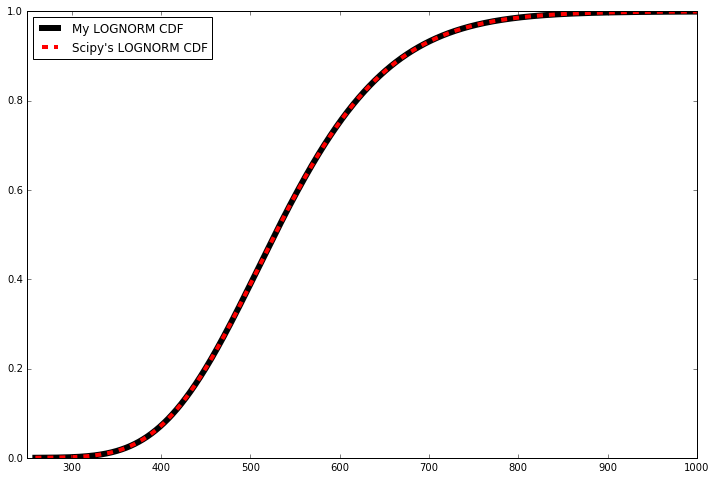

In [9]:
plt.figure(figsize=(12,8))

x = np.linspace(min(data), max(data), 10000)

mu       = np.mean(np.log(data))
sigma    = np.std(np.log(data))
scale    = np.exp(mu)


plt.plot(x, Lognorm.cdf(x, mu, sigma), 'k-', lw=6, label="My LOGNORM CDF")

plt.plot(x, lognorm.cdf(x, sigma, mu/scale, scale), 'r--', lw=4, label="Scipy's LOGNORM CDF")

plt.xlim(250,1000)
plt.legend(loc='best')

## The quantiles match up between Scipy's and My Lognormal Function.

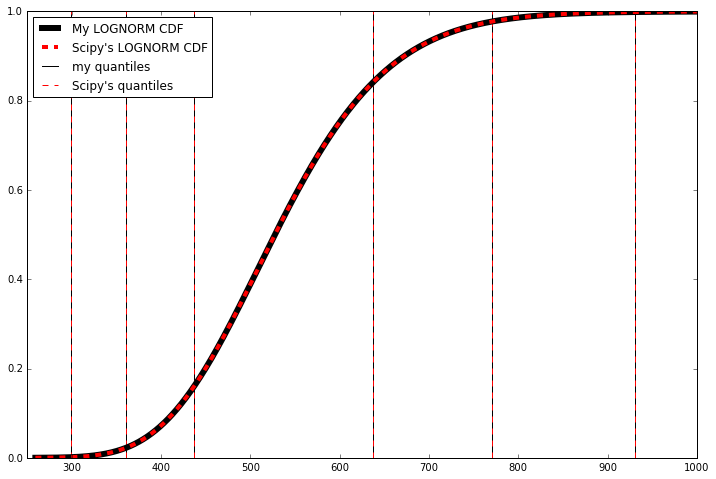

In [10]:
plt.figure(figsize=(12,8))

x = np.linspace(min(data), max(data), 10000)

mu       = np.mean(np.log(data))
sigma    = np.std(np.log(data))
scale    = np.exp(mu)


plt.plot(x, Lognorm.cdf(x, mu, sigma), 'k-', lw=6, label="My LOGNORM CDF")

plt.plot(x, lognorm.cdf(x, sigma, mu/scale, scale), 'r--', lw=4, label="Scipy's LOGNORM CDF")

valsA = Lognorm.quantile([0.15865, 0.84135, 0.0227499999, 0.97725, 0.00135, 0.99865], mu_lognorm, sigma_lognorm)
valsB = lognorm.ppf([0.15865, 0.84135, 0.0227499999, 0.97725, 0.00135, 0.99865], sigma, mu/scale, scale)

plt.vlines(valsA, 0, 1.0, linestyle='-', color='black', label="my quantiles")
plt.vlines(valsB, 0, 1.0, linestyle='--', color='red', label="Scipy's quantiles")

plt.xlim(250,1000)
plt.legend(loc='best')

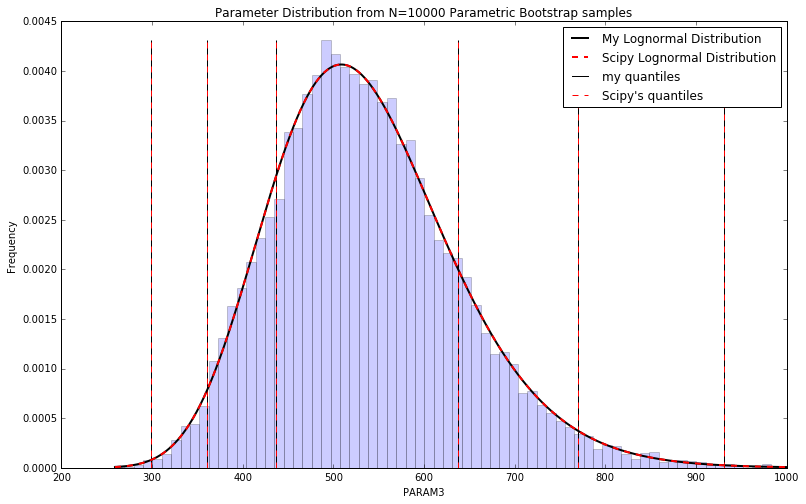

In [11]:
nData = 10000
XLabel = "PARAM3"

data = Bdata[XLabel]

plt.figure(figsize=(13,8))

count, bins, ignored = plt.hist(data, bins=100, normed=True, align='mid', alpha=0.2)


# ************   NORMAL DISTRIBUTION USING MY Lognorm function  ************ 
# mu and sigma for the Lognormal Distribution
mu_lognorm      = np.mean(np.log(data))  # the mean of the logged data
sigma_lognorm   = np.std(np.log(data))   # the standard deviation of the logged data

x               = np.linspace(min(bins), max(bins), 1000)
y               = Lognorm.pdf(x, mu_lognorm, sigma_lognorm)
plt.plot(x, y, 'k-', lw=2, label= "My Lognormal Distribution")


# ************   NORMAL DISTRIBUTION USING scipy.stats.lognorm  ************ 
# mu and sigma are the same as the above for the Lognormal Distribution
mu             = mu_lognorm
sigma          = sigma_lognorm
scale          = np.exp(mu_lognorm)

x              = np.linspace(min(bins), max(bins), 1000)
y              = lognorm.pdf(x/scale, sigma)/scale # x, sigma, mu, scale
plt.plot(x, y, 'r--', lw=2, label="Scipy Lognormal Distribution")

valsA = Lognorm.quantile([0.15865, 0.84135, 0.0227499999, 0.97725, 0.00135, 0.99865], mu_lognorm, sigma_lognorm)
valsB = lognorm.ppf([0.15865, 0.84135, 0.0227499999, 0.97725, 0.00135, 0.99865], sigma, mu/scale, scale)

plt.vlines(valsA, 0, count.max(), linestyle='-', color='black', label="my quantiles")
plt.vlines(valsB, 0, count.max(), linestyle='--', color='red', label="Scipy's quantiles")

plt.xlim(200, 1000)
plt.ylabel("Frequency")
plt.xlabel("%s"%XLabel)
plt.legend(loc='best')
plt.title("Parameter Distribution from N=%i Parametric Bootstrap samples"%nData)